In [9]:
cd ..

c:\Users\User\OneDrive - jbnu.ac.kr\바탕 화면\내 기록\minecraft


c:\Users\User\OneDrive - jbnu.ac.kr\바탕 화면\내 기록\minecraft\minevenv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [10]:
cd log분석/

c:\Users\User\OneDrive - jbnu.ac.kr\바탕 화면\내 기록\minecraft\log분석


In [11]:
pwd

'c:\\Users\\User\\OneDrive - jbnu.ac.kr\\바탕 화면\\내 기록\\minecraft\\log분석'

In [12]:
import glob
import gzip
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import mysql.connector
plt.rcParams['font.family'] = 'NanumGothic'
pd.set_option('display.max.colwidth', 1000)

pattern = r"\[(.*?)\] \[(.*?)\]: (.*)"
file_list = glob.glob('log/*.gz')
data = []
for file in file_list:
    with gzip.open(file, 'rb') as f:
        log_data = f.read().decode('utf-8')
        groups = re.findall(pattern, log_data)
        for group in groups:
            data.append(group)

# db = mysql.connector.connect(
#             host="112.157.225.157",
#             user="forecity",
#             password="mineie5050@",
#             database="view_dbb"
#         )
# cursor = db.cursor()
# query = 'SELECT name FROM player_info_view'
# cursor.execute(query)
# rows = cursor.fetchall()
# user_df = pd.DataFrame(rows, columns=['Username'])
# lst = list(user_df['Username'].values)
        
df = pd.DataFrame(data, columns=['Timestamp', 'Level', 'Message'])
df = df[~df['Message'].str.contains('청소')] # 청소 관련 처리 
df_chat = df[df['Level'].str.contains('Async Chat Thread')]
df_chat
# df_chat['Level'].value_counts()

,Timestamp,Level,Message
802,08:31:22,Async Chat Thread - #1/INFO,◎OP◎ [자유챗] Loitec1114 >> ㅁ
2181,09:54:32,Async Chat Thread - #6/INFO,[뉴비] [자유챗] Loitec1114 >> ㅁ
2781,00:39:44,Async Chat Thread - #78/INFO,[뉴비] [자유챗] [Utopia] Install_Roblox[리더] >> 혹시 도움이 필요하신가요?
2782,00:39:51,Async Chat Thread - #78/INFO,[뉴비] [자유챗] [bangbong0] bangbong0[리더] >> ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
2783,00:39:55,Async Chat Thread - #79/INFO,[뉴비] [자유챗] [Utopia] Install_Roblox[리더] >> ㅋㅋㅋㅋㅋㅋㅋㅋ
...,...,...,...
39320,16:20:31,Async Chat Thread - #61/INFO,[뉴비] [마을챗] [크리스탈] biracksickhye JMT >> 3277 3191 189
39327,16:21:21,Async Chat Thread - #61/INFO,[뉴비] [마을챗] [크리스탈] biracksickhye JMT >> 531 194 3229
39329,16:21:46,Async Chat Thread - #62/INFO,[뉴비] [마을챗] [크리스탈] biracksickhye JMT >> 531 194 3229
39337,16:22:26,Async Chat Thread - #61/INFO,[뉴비] [마을챗] [크리스탈] biracksickhye JMT >> 531 194 3229


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_chat['Message']) # tf-idf적용
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)
df_chat['Cluster'] = kmeans.labels_


C:\Users\User\AppData\Local\Temp\ipykernel_16120\65772306.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chat['Cluster'] = kmeans.labels_


In [14]:
df_chat[df_chat['Cluster'] == 1] # 클러스터 1에 배정된 대화들 

,Timestamp,Level,Message,Cluster
7230,11:04:29,Async Chat Thread - #2/INFO,[자유챗] Nangman1999 >> ㅇㅇ,1
7442,13:43:12,Async Chat Thread - #19/INFO,[자유챗] Nangman1999 >> 안녕하세요,1
7453,13:44:11,Async Chat Thread - #20/INFO,[뉴비] [자유챗] Nangman1999 >> 오 마을도 있으시네요,1
7455,13:44:18,Async Chat Thread - #19/INFO,[뉴비] [자유챗] Nangman1999 >> 돈 벌려면 뭐가 제일 잘벌리나요 ?,1
7459,13:44:54,Async Chat Thread - #20/INFO,[뉴비] [자유챗] Nangman1999 >> 아하 !!,1
...,...,...,...,...
32870,00:24:14,Async Chat Thread - #131/INFO,[뉴비] [자유챗] [tanker] chuzzang[리더] >> ㅋㅋㅋㅋ,1
32871,00:24:16,Async Chat Thread - #131/INFO,[뉴비] [자유챗] [tanker] chuzzang[리더] >> 고마워옄ㅋㅋㅋ,1
32879,00:25:21,Async Chat Thread - #131/INFO,[뉴비] [자유챗] [tanker] chuzzang[리더] >> 있는데,1
32880,00:25:23,Async Chat Thread - #131/INFO,[뉴비] [자유챗] [tanker] chuzzang[리더] >> 데려가고싶은데,1


In [15]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()
for cluster_label in range(num_clusters):
    cluster_messages = df_chat[df_chat['Cluster'] == cluster_label]['Message']
    print(f"< 클러스터 {cluster_label} 주요단어 > ")
    for ind in order_centroids[0, :5]:  # Print top 10 terms per cluster
        print(f"   {terms[ind]}")
    print("\n")
    print('<메시지들>')
    print(cluster_messages[0:5])
    print("\n")

< 클러스터 0 주요단어 > 
   loitec1114
   op
   크리스탈
   마을챗
   청년들집


<메시지들>
802                       ◎OP◎ [자유챗] Loitec1114 >> ㅁ
2181                      [뉴비] [자유챗] Loitec1114 >> ㅁ
3786                     ◎OP◎ [자유챗] pm0813 >> 안녕하세요!
3798                   ◎OP◎ [자유챗] pm0813 >> 안녕하세요 !!
3801    ◎OP◎ [자유챗] pm0813 >> 아직은 리젠되지 않지만 계획중에 있습니다!
Name: Message, dtype: object


< 클러스터 1 주요단어 > 
   loitec1114
   op
   크리스탈
   마을챗
   청년들집


<메시지들>
7230                          [자유챗] Nangman1999 >> ㅇㅇ
7442                       [자유챗] Nangman1999 >> 안녕하세요
7453            [뉴비] [자유챗] Nangman1999 >> 오 마을도 있으시네요
7455    [뉴비] [자유챗] Nangman1999 >> 돈 벌려면 뭐가 제일 잘벌리나요 ?
7459                  [뉴비] [자유챗] Nangman1999 >> 아하 !!
Name: Message, dtype: object


< 클러스터 2 주요단어 > 
   loitec1114
   op
   크리스탈
   마을챗
   청년들집


<메시지들>
2781    [뉴비] [자유챗] [Utopia] Install_Roblox[리더] >> 혹시 도움이 필요하신가요?
2782         [뉴비] [자유챗] [bangbong0] bangbong0[리더] >> ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
2783          [뉴비] [자유챗] [Utopia] Install_Roblox[리더] >> ㅋㅋㅋㅋㅋㅋㅋㅋ
2

In [16]:
df_chat

,Timestamp,Level,Message,Cluster
802,08:31:22,Async Chat Thread - #1/INFO,◎OP◎ [자유챗] Loitec1114 >> ㅁ,0
2181,09:54:32,Async Chat Thread - #6/INFO,[뉴비] [자유챗] Loitec1114 >> ㅁ,0
2781,00:39:44,Async Chat Thread - #78/INFO,[뉴비] [자유챗] [Utopia] Install_Roblox[리더] >> 혹시 도움이 필요하신가요?,2
2782,00:39:51,Async Chat Thread - #78/INFO,[뉴비] [자유챗] [bangbong0] bangbong0[리더] >> ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,2
2783,00:39:55,Async Chat Thread - #79/INFO,[뉴비] [자유챗] [Utopia] Install_Roblox[리더] >> ㅋㅋㅋㅋㅋㅋㅋㅋ,2
...,...,...,...,...
39320,16:20:31,Async Chat Thread - #61/INFO,[뉴비] [마을챗] [크리스탈] biracksickhye JMT >> 3277 3191 189,4
39327,16:21:21,Async Chat Thread - #61/INFO,[뉴비] [마을챗] [크리스탈] biracksickhye JMT >> 531 194 3229,4
39329,16:21:46,Async Chat Thread - #62/INFO,[뉴비] [마을챗] [크리스탈] biracksickhye JMT >> 531 194 3229,4
39337,16:22:26,Async Chat Thread - #61/INFO,[뉴비] [마을챗] [크리스탈] biracksickhye JMT >> 531 194 3229,4


In [17]:
df_chat['talk'] = df_chat['Message'].str.extract(r'>>\s*(.+)')
df_chat['talk'] 

C:\Users\User\AppData\Local\Temp\ipykernel_16120\775237149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chat['talk'] = df_chat['Message'].str.extract(r'>>\s*(.+)')


802                   ㅁ
2181                  ㅁ
2781     혹시 도움이 필요하신가요?
2782        ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
2783           ㅋㅋㅋㅋㅋㅋㅋㅋ
              ...      
39320     3277 3191 189
39327      531 194 3229
39329      531 194 3229
39337      531 194 3229
39380                채팅
Name: talk, Length: 5064, dtype: object

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_chat['talk']) # tf-idf적용

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)
df_chat['Cluster'] = kmeans.labels_


C:\Users\User\AppData\Local\Temp\ipykernel_16120\1044113911.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chat['Cluster'] = kmeans.labels_


In [19]:
for i in range(10):
    print(f'<군집 {i}>')
    print(df_chat[df_chat['Cluster'] == i]['Level'].value_counts())

<군집 0>
Level
Async Chat Thread - #96/INFO    1
Name: count, dtype: int64
<군집 1>
Level
Async Chat Thread - #27/INFO    1
Name: count, dtype: int64
<군집 2>
Level
Async Chat Thread - #109/INFO    1
Async Chat Thread - #92/INFO     1
Async Chat Thread - #14/INFO     1
Async Chat Thread - #96/INFO     1
Async Chat Thread - #98/INFO     1
Async Chat Thread - #36/INFO     1
Async Chat Thread - #49/INFO     1
Async Chat Thread - #11/INFO     1
Async Chat Thread - #12/INFO     1
Async Chat Thread - #100/INFO    1
Async Chat Thread - #51/INFO     1
Name: count, dtype: int64
<군집 3>
Level
Async Chat Thread - #75/INFO     3
Async Chat Thread - #90/INFO     1
Async Chat Thread - #46/INFO     1
Async Chat Thread - #74/INFO     1
Async Chat Thread - #127/INFO    1
Name: count, dtype: int64
<군집 4>
Level
Async Chat Thread - #90/INFO     182
Async Chat Thread - #39/INFO     118
Async Chat Thread - #40/INFO     104
Async Chat Thread - #110/INFO    101
Async Chat Thread - #12/INFO      86
                  

In [20]:
df_chat[df_chat['Cluster'] == 3]['talk']

12888    다음부턴 100원 내고 텔포 가능
15320           텔포 한 번 시켜줄게
30953        그러고 텔포 가능한지 봐봐
30955         텔포 가능하다 떠야하거든
30959                   텔포?
30968                텔포 되냐고
32808       한번갔다오면 텔포 가능하구여
Name: talk, dtype: object

In [21]:
df_chat[df_chat['Cluster'] == 2]['talk']

4990     다이아 7 + 네더랙1개 + 네더형판 입니다
10569             나무 돌 철 다이아 순서잖아
11649                         다이아
13247               다이아 곡 하나 만들어서
13249                  다이아 캐러가는건데
15223                         다이아
15351                 다이아 풀셋도 모자라
25403                    헉 다이아 ㅋㅋ
25406           엘바 개트롤새기 다이아 투구보소
31872                 캐는거고 저건 다이아
37241                         다이아
Name: talk, dtype: object

In [22]:
df_chat['Message']

802                                    ◎OP◎ [자유챗] Loitec1114 >> ㅁ
2181                                   [뉴비] [자유챗] Loitec1114 >> ㅁ
2781     [뉴비] [자유챗] [Utopia] Install_Roblox[리더] >> 혹시 도움이 필요하신가요?
2782          [뉴비] [자유챗] [bangbong0] bangbong0[리더] >> ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
2783           [뉴비] [자유챗] [Utopia] Install_Roblox[리더] >> ㅋㅋㅋㅋㅋㅋㅋㅋ
                                   ...                           
39320        [뉴비] [마을챗] [크리스탈] biracksickhye JMT >> 3277 3191 189
39327         [뉴비] [마을챗] [크리스탈] biracksickhye JMT >> 531 194 3229
39329         [뉴비] [마을챗] [크리스탈] biracksickhye JMT >> 531 194 3229
39337         [뉴비] [마을챗] [크리스탈] biracksickhye JMT >> 531 194 3229
39380                        [뉴비] [마을챗] [크리스탈] 나 WUSUCK 아니다 >> 채팅
Name: Message, Length: 5064, dtype: object

In [23]:
df_chat['talk'] = df_chat['Message'].str.extract(r'>>\s*(.+)')
df_chat['talk']

C:\Users\User\AppData\Local\Temp\ipykernel_16120\3544414148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chat['talk'] = df_chat['Message'].str.extract(r'>>\s*(.+)')


802                   ㅁ
2181                  ㅁ
2781     혹시 도움이 필요하신가요?
2782        ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
2783           ㅋㅋㅋㅋㅋㅋㅋㅋ
              ...      
39320     3277 3191 189
39327      531 194 3229
39329      531 194 3229
39337      531 194 3229
39380                채팅
Name: talk, Length: 5064, dtype: object

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
df_chat['talk'] = df_chat['Message'].str.extract(r'>>\s*(.+)')

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_chat['talk']) # tf-idf적용

num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)
df_chat['Cluster'] = kmeans.labels_

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()
for cluster_label in range(num_clusters):
    print(f"< 클러스터 {cluster_label} 주요 단어 > ")
    for ind in order_centroids[cluster_label, :3]:  # 상위 5개 단어 출력
        print(f"   {terms[ind]}")
    print("\n")
    
    print('<메시지들>')
    cluster_messages = df_chat[df_chat['Cluster'] == cluster_label]['talk'].head(5)  # 클러스터별 상위 5개 메시지
    print(cluster_messages)
    print("\n")
    print(f'{cluster_label} 군집 level value_counts')
    print("\n")
    print(df_chat[df_chat['Cluster'] == cluster_label]['Level'].value_counts())
    print("\n")

C:\Users\User\AppData\Local\Temp\ipykernel_16120\1359657574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chat['talk'] = df_chat['Message'].str.extract(r'>>\s*(.+)')
C:\Users\User\AppData\Local\Temp\ipykernel_16120\1359657574.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chat['Cluster'] = kmeans.labels_


< 클러스터 0 주요 단어 > 
   도박들이나
   힘들자너
   마을채팅이


<메시지들>
13209    도박들이나 좀
Name: talk, dtype: object


0 군집 level value_counts


Level
Async Chat Thread - #96/INFO    1
Name: count, dtype: int64


< 클러스터 1 주요 단어 > 
   어ㅏ
   힘들자너
   마을채팅이


<메시지들>
38983    어ㅏ
Name: talk, dtype: object


1 군집 level value_counts


Level
Async Chat Thread - #27/INFO    1
Name: count, dtype: int64


< 클러스터 2 주요 단어 > 
   다이아
   캐러가는건데
   순서잖아


<메시지들>
4990     다이아 7 + 네더랙1개 + 네더형판 입니다
10569             나무 돌 철 다이아 순서잖아
11649                         다이아
13247               다이아 곡 하나 만들어서
13249                  다이아 캐러가는건데
Name: talk, dtype: object


2 군집 level value_counts


Level
Async Chat Thread - #109/INFO    1
Async Chat Thread - #92/INFO     1
Async Chat Thread - #14/INFO     1
Async Chat Thread - #96/INFO     1
Async Chat Thread - #98/INFO     1
Async Chat Thread - #36/INFO     1
Async Chat Thread - #49/INFO     1
Async Chat Thread - #11/INFO     1
Async Chat Thread - #12/INFO     1
Async Chat Thread - #100/IN

In [25]:
df_chat[df_chat['Cluster'] == 4]['talk']

802                   ㅁ
2181                  ㅁ
2781     혹시 도움이 필요하신가요?
2782        ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
2783           ㅋㅋㅋㅋㅋㅋㅋㅋ
              ...      
39320     3277 3191 189
39327      531 194 3229
39329      531 194 3229
39337      531 194 3229
39380                채팅
Name: talk, Length: 5038, dtype: object

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

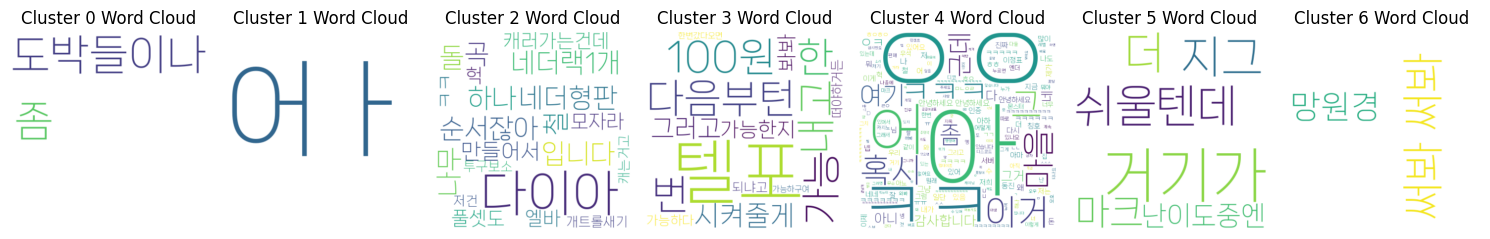

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False

# 클러스터별 워드 클라우드 그리기
fig, axes = plt.subplots(1, num_clusters, figsize=(15, 10))  # 수평으로 배열

for cluster_label in range(num_clusters):
    # 클러스터에 속하는 메시지들을 가져와서 하나의 문자열로 결합
    cluster_messages = df_chat[df_chat['Cluster'] == cluster_label]['taklk']
    cluster_text = ' '.join(cluster_messages)

    # 워드 클라우드 생성
    wordcloud = WordCloud(font_path='C:/Users/User/OneDrive - jbnu.ac.kr/바탕 화면/내 기록/minecraft/log분석/NanumSquareNeo-Variable.ttf', background_color='white', width=400, height=400).generate(cluster_text)

    # 워드 클라우드 출력
    axes[cluster_label].imshow(wordcloud, interpolation='bilinear')
    axes[cluster_label].set_title(f'Cluster {cluster_label} Word Cloud')
    axes[cluster_label].axis('off')

plt.tight_layout()
plt.show()

In [29]:
df_chat

,Timestamp,Level,Message,Cluster,talk
802,08:31:22,Async Chat Thread - #1/INFO,◎OP◎ [자유챗] Loitec1114 >> ㅁ,4,ㅁ
2181,09:54:32,Async Chat Thread - #6/INFO,[뉴비] [자유챗] Loitec1114 >> ㅁ,4,ㅁ
2781,00:39:44,Async Chat Thread - #78/INFO,[뉴비] [자유챗] [Utopia] Install_Roblox[리더] >> 혹시 도움이 필요하신가요?,4,혹시 도움이 필요하신가요?
2782,00:39:51,Async Chat Thread - #78/INFO,[뉴비] [자유챗] [bangbong0] bangbong0[리더] >> ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,4,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
2783,00:39:55,Async Chat Thread - #79/INFO,[뉴비] [자유챗] [Utopia] Install_Roblox[리더] >> ㅋㅋㅋㅋㅋㅋㅋㅋ,4,ㅋㅋㅋㅋㅋㅋㅋㅋ
...,...,...,...,...,...
39320,16:20:31,Async Chat Thread - #61/INFO,[뉴비] [마을챗] [크리스탈] biracksickhye JMT >> 3277 3191 189,4,3277 3191 189
39327,16:21:21,Async Chat Thread - #61/INFO,[뉴비] [마을챗] [크리스탈] biracksickhye JMT >> 531 194 3229,4,531 194 3229
39329,16:21:46,Async Chat Thread - #62/INFO,[뉴비] [마을챗] [크리스탈] biracksickhye JMT >> 531 194 3229,4,531 194 3229
39337,16:22:26,Async Chat Thread - #61/INFO,[뉴비] [마을챗] [크리스탈] biracksickhye JMT >> 531 194 3229,4,531 194 3229
